# Построение графа из транзакций

Главная идея:

Каждая строка = одна вершина (узел, node) графа

Рёбра (связи) между узлами добавляются по какому-то смысловому принципу (например: общий номер карты, имейл, адрес, device и т.п.)

Пример: Связываем все транзакции с одинаковой card1

In [22]:
import pandas as pd
df = pd.read_csv('../data/processing/df_preprocessing.csv') # Твой датасет

In [23]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, test_size=0.2, shuffle=False
)

In [ ]:
import numpy as np
import torch
from torch_geometric.data import Data

def create_graph(df: pd.DataFrame):
    #for col in ['ProductCD', 'card4', 'card6', 'P_emaildomain']:
    #    le = LabelEncoder()
    #    df[col] = le.fit_transform(df[col].astype(str))

    # Выбираем признаки для узлов:
    feature_cols = [
        'ProductCD', 'card1', 'card2', 'card3',
        'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain',
        'Relative_TransactionDT', 'Transaction_day', 'Transaction_hour',
        'Transaction_weekday', 'log_TransactionAmt', 'TransactionAmt_binned',
        'isOutlier',
        'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'M6', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321'
    ]
    x = torch.tensor(df[feature_cols].values, dtype=torch.float)

    # Формируем ребра: все пары транзакций с одинаковой 'card1'
    edges = []
    groups = df.groupby('card1').groups
    for card, idxs in groups.items():
        idxs = list(idxs)
        for i in range(len(idxs)):
            for j in range(i+1, len(idxs)):
                edges.append([idxs[i], idxs[j]])
                edges.append([idxs[j], idxs[i]])
    edge_index = torch.tensor(np.array(edges).T, dtype=torch.long)  # размер [2, num_edges]

    y = torch.tensor(df['isFraud'].values, dtype=torch.long)

    return Data(x=x, edge_index=edge_index, y=y)

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data

#df = pd.read_csv('../data/processing/df_preprocessing.csv') # Твой датасет
#
## Преобразуем категориальные
#from sklearn.preprocessing import LabelEncoder
#for col in ['ProductCD', 'card4', 'card6', 'P_emaildomain']:
#    le = LabelEncoder()
#    df[col] = le.fit_transform(df[col].astype(str))
#
## Выбираем признаки для узлов:
#feature_cols = [
#    'ProductCD', 'card1', 'card2', 'card3',
#    'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain',
#    'Relative_TransactionDT', 'Transaction_day', 'Transaction_hour',
#    'Transaction_weekday', 'log_TransactionAmt', 'TransactionAmt_binned',
#    'isOutlier'
#]
#x = torch.tensor(df[feature_cols].values, dtype=torch.float)
#
## Формируем ребра: все пары транзакций с одинаковой 'card1'
#edges = []
#groups = df.groupby('card1').groups
#for card, idxs in groups.items():
#    idxs = list(idxs)
#    for i in range(len(idxs)):
#        for j in range(i+1, len(idxs)):
#            edges.append([idxs[i], idxs[j]])
#            edges.append([idxs[j], idxs[i]])
#edge_index = torch.tensor(np.array(edges).T, dtype=torch.long)  # размер [2, num_edges]
#
#y = torch.tensor(df['isFraud'].values, dtype=torch.long)

#data = Data(x=x, edge_index=edge_index, y=y)
train_data = create_graph(train_df)
train_data

In [ ]:
test_data = create_graph(test_df)
test_data

In [ ]:
from torch_geometric.loader import NeighborLoader

# Пусть у тебя граф data как выше

batch_size = 512  # Сколько узлов (транзакций) в одном батче
num_neighbors = [10, 5]  # Сколько соседей собирать на 1-м и 2-м слоях

train_loader = NeighborLoader(
    train_data,
    num_neighbors=num_neighbors,
    batch_size=batch_size,
    shuffle=False,  # в обучении должен быть shuffle
)

for batch in train_loader:
    print(batch)
    break
    # batch — это subgraph PyG Data
    # batch.x — признаки только выборки и соседей
    # batch.edge_index — рёбра внутри subgraph
    # batch.y — метки
    # batch.batch_size — число целевых узлов в батче (остальные — только соседи)
    # batch.n_id — индексы оригинальных узлов (если надо сопоставлять)
    ##logits = model(batch.x, batch.edge_index)
    # обычно batch.y[:batch.batch_size] — только лейблы тех, что в батче, а не у всех соседей
    ##loss = loss_fn(logits[:batch.batch_size], batch.y[:batch.batch_size])
    ##loss.backward()
    ##optimizer.step()
    ##...

In [22]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class SimpleGNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super().__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x.squeeze()

In [23]:
class GCNWithLinear(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super().__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.lin(x)
        return x.squeeze()

In [74]:
from torch_geometric.loader import NeighborLoader

# 🔁 Обучение
def train(model, loader: NeighborLoader, criterion=nn.BCEWithLogitsLoss(), epochs=100, lr=0.01):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    #criterion = nn.BCEWithLogitsLoss()

    for epoch in range(epochs):

        for batch in loader:
            #print(batch)
            optimizer.zero_grad()
            logits = model(batch.x, batch.edge_index)
            #обычно batch.y[:batch.batch_size] — только лейблы тех, что в батче, а не у всех соседей
            loss = criterion(logits[:batch.batch_size], batch.y[:batch.batch_size].float())
            loss.backward()
            optimizer.step()
        
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

In [104]:
import torch
from torch import nn
from torch_geometric.loader import NeighborLoader

def train(
    model, 
    loader: NeighborLoader, 
    criterion=None, 
    optimizer=None, 
    scheduler=None, 
    epochs=100, 
    device="cpu", 
    grad_clip=None,
    verbose=True):

    model.to(device)
    model.train()

    # если не передан criterion - задаём BCEWithLogitsLoss
    if criterion is None:
        criterion = nn.BCEWithLogitsLoss()
    # если не передан оптимизатор - задаём AdamW + weight_decay
    if optimizer is None:
        optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=5e-4)
    # Можно добавить ReduceLROnPlateau или StepLR
    if scheduler is None:
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5)

    for epoch in range(epochs):
        epoch_loss = 0
        total = 0
        for batch in loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            logits = model(batch.x, batch.edge_index)
            loss = criterion(logits[:batch.batch_size], batch.y[:batch.batch_size].float())
            loss.backward()
            if grad_clip is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
            optimizer.step()
            batch_size = batch.batch_size
            epoch_loss += loss.item() * batch_size  # Даём вес по числу батч
            total += batch_size

        avg_loss = epoch_loss / total if total > 0 else 0
        scheduler.step(avg_loss)
        if verbose:
            print(f"Epoch {epoch+1:03d}/{epochs}, Avg Loss: {avg_loss:.4f}, LR: {optimizer.param_groups[0]['lr']:.5f}")

In [ ]:
#device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
device = torch.device("cpu")
model_simple_gnn = SimpleGNN(input_dim=train_data.x.shape[1], hidden_dim=32).to(device)
#data = data.to(device)

train(model=model_simple_gnn, loader=train_loader, epochs=5, lr=0.01)

In [93]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# 📊 Тест
@torch.no_grad()
def evaluate(model, loader: NeighborLoader, name="Model"):
    model.eval()

    all_true = []
    all_probs = []
    all_preds = []
    for batch in loader:
        # Если используешь device:
        # batch = batch.to(device)
        logits = model(batch.x, batch.edge_index)
        # Только для центрального батча:
        logits = logits[:batch.batch_size]
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).long()
        true = batch.y[:batch.batch_size].long()
        all_true.append(true.cpu())
        all_probs.append(probs.cpu())
        all_preds.append(preds.cpu())

    all_true = torch.cat(all_true).numpy()
    all_probs = torch.cat(all_probs).numpy()
    all_preds = torch.cat(all_preds).numpy()


    # 🎯 ROC AUC
    fpr, tpr, _ = roc_curve(all_true, all_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # 🎯 PR AUC
    precision, recall, _ = precision_recall_curve(all_true, all_probs)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f"{name} (PR AUC = {pr_auc:.2f})")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

    return {
        "Accuracy": accuracy_score(all_true, all_preds),
        "F1": f1_score(all_true, all_preds),
        "AUC": roc_auc_score(all_true, all_probs),
        "Precision": precision_score(all_true, all_preds),
        "Recall": recall_score(all_true, all_preds)
    }

In [ ]:
evaluate(model=model_simple_gnn, loader=train_loader, name='Train SimpleGNN')

In [ ]:
batch_size = 512  # Сколько узлов (транзакций) в одном батче
num_neighbors = [10, 5]  # Сколько соседей собирать на 1-м и 2-м слоях

test_loader = NeighborLoader(
    test_data,
    num_neighbors=num_neighbors,
    batch_size=batch_size,
    shuffle=False,  # в обучении должен быть shuffle
)

evaluate(model=model_simple_gnn, loader=test_loader, name='Test SimpleGNN')

In [19]:
import pandas as pd
import torch
from torch_geometric.data import Data, Batch

# Пример: фрейм с транзакциями
# df  --- DataFrame транзакций, ужe индексация по df.index
# batch_indices --- индексы транзакций для текущего батча (например, [10,456,321])

def build_ego_graphs_for_batch(df, batch_indices, cols=['card1', 'P_emaildomain']):
    edge_indices_list = []
    node_features_list = []
    node_id_remap = {}
    new_id = 0
    batch_node_ids = []
    
    # Накапливаем все уникальные индексы из эго-графов
    for idx in batch_indices:
        # Вытаскиваем все связи для данной транзакции
        sub_idx = set()
        for col in cols:
            val = df.at[idx, col]
            if pd.isna(val): continue
            matches = df.index[df[col] == val]
            sub_idx.update(matches)
        batch_node_ids.append(idx)
        sub_idx.add(idx)  # сам себя тоже включаем
        for nid in sub_idx:
            if nid not in node_id_remap:
                node_id_remap[nid] = new_id
                new_id +=1
        # Формируем рёбра эго: от idx ко всем sub_idx (включая себя)
        center = node_id_remap[idx]
        for nidx in sub_idx:
            nid_new = node_id_remap[nidx]
            # В обе стороны — если нужно
            if nidx != idx:
                edge_indices_list.append( (center, nid_new) )
                edge_indices_list.append( (nid_new, center) )
    
    nodes = list(node_id_remap.keys())
    x = torch.tensor(df.loc[nodes, df.columns.difference(cols+['isFraud'])].values, dtype=torch.float)
    edge_index = torch.tensor(edge_indices_list, dtype=torch.long).t().contiguous()
    y = torch.tensor(df.loc[batch_node_ids, 'isFraud'].values, dtype=torch.long)

    # batch vector нужен для Batch/from_data_list, если несколько эго-графов
    return Data(x=x, edge_index=edge_index, y=y)

In [18]:
device = torch.device("cpu")
model_simple_gnn = SimpleGNN(input_dim=128, hidden_dim=32).to(device)
optimizer = torch.optim.Adam(model_simple_gnn.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()

batch_size = 128
all_indices = df.index.values
num_batches = len(all_indices) // batch_size

for batch_i in range(num_batches):
    batch_indices = all_indices[batch_i*batch_size:(batch_i+1)*batch_size]
    data = build_ego_graphs_for_batch(df, batch_indices)
    data = data.to(device)

    logits = model_simple_gnn(data.x, data.edge_index)
    # Предсказания только по центральным узлам каждого графа
    # Так как Batch.from_data_list сохраняет порядок -> берем первые N
    out = logits[data.__slices__['x'][:-1]]  # индекс центральных узлов в начале каждого графа
    loss = criterion(out.squeeze(), data.y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (14637024x206 and 128x32)

In [25]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
import random

# === 1. Генерируем искусственный небольшой data set ===
#N = 100_000
#df = pd.DataFrame({
#    'TransactionID': range(N),
#    'TransactionAmt': np.random.uniform(10, 2000, N),
#    'C1': np.random.randn(N),
#    'isFraud': np.random.binomial(1, 0.05, N),
#    'card1': np.random.choice(['CARD_' + str(i) for i in range(5000)], N)
#})

# === 2. Функция генерации батча подграфа ===

def make_batch_graph(df, batch_idxs, feature_cols=['TransactionAmt','C1'], link_cols=['card1']):
    # batch_idxs: индексы строк df для батча
    batch_df = df.iloc[batch_idxs]
    batch_map = {idx: i for i, idx in enumerate(batch_df.index)}
    x = torch.FloatTensor(batch_df[feature_cols].values)
    y = torch.FloatTensor(batch_df['isFraud'].values)
    # Соберём все пары узлов батча, которые имеют тот же link_col
    edges_src, edges_dst = [], []
    for col in link_cols:
        groups = batch_df.groupby(col).groups
        for group in groups.values():
            inds = list(group)
            # Соединяем все уникальные пары внутри группы (без self-loop)
            for i in range(len(inds)):
                for j in range(len(inds)):
                    if i != j:
                        edges_src.append(batch_map[inds[i]])
                        edges_dst.append(batch_map[inds[j]])
    edge_index = torch.LongTensor([edges_src, edges_dst]) if edges_src else torch.empty((2,0), dtype=torch.long)
    # Central mask: центральные узлы (здесь все батч-узлы), можно пометить как torch.arange(len(batch_idxs))
    central_mask = torch.arange(len(batch_idxs))
    data = Data(x=x, edge_index=edge_index, y=y, central_mask=central_mask)
    return data

# === 3. Демонстрация: создаём последовательные батчи и скармливаем в модель ===

batch_size = 128
# Просто пример, как делать random permutation и по очереди формировать батчи
node_indices = np.arange(len(df))
np.random.shuffle(node_indices)

# Например, 10 батчей — просто показать как можно делать итерацию
num_batches = int(np.ceil(len(node_indices) / batch_size))

for step in range(num_batches):
    batch_idxs = node_indices[step*batch_size:(step+1)*batch_size]
    data_batch = make_batch_graph(df, batch_idxs)  # Data с edge_index только для этого батча
    # Вот как можно использовать:
    # out = model(data_batch.x, data_batch.edge_index)
    print(f"Step {step}: batch_nodes = {data_batch.num_nodes}, edges = {data_batch.edge_index.size(1)}")

Step 0: batch_nodes = 128, edges = 62
Step 1: batch_nodes = 128, edges = 52
Step 2: batch_nodes = 128, edges = 90
Step 3: batch_nodes = 128, edges = 80
Step 4: batch_nodes = 128, edges = 158
Step 5: batch_nodes = 128, edges = 56
Step 6: batch_nodes = 128, edges = 78
Step 7: batch_nodes = 128, edges = 60
Step 8: batch_nodes = 128, edges = 74
Step 9: batch_nodes = 128, edges = 62
Step 10: batch_nodes = 128, edges = 110
Step 11: batch_nodes = 128, edges = 94
Step 12: batch_nodes = 128, edges = 72
Step 13: batch_nodes = 128, edges = 52
Step 14: batch_nodes = 128, edges = 68
Step 15: batch_nodes = 128, edges = 62
Step 16: batch_nodes = 128, edges = 84
Step 17: batch_nodes = 128, edges = 68
Step 18: batch_nodes = 128, edges = 48
Step 19: batch_nodes = 128, edges = 76
Step 20: batch_nodes = 128, edges = 88
Step 21: batch_nodes = 128, edges = 40
Step 22: batch_nodes = 128, edges = 100
Step 23: batch_nodes = 128, edges = 72
Step 24: batch_nodes = 128, edges = 88
Step 25: batch_nodes = 128, edge

In [26]:
def batch_iterator(df, batch_size):
    node_indices = np.arange(len(df))
    np.random.shuffle(node_indices)
    for step in range(0, len(node_indices), batch_size):
        batch_idxs = node_indices[step:step+batch_size]
        yield make_batch_graph(df, batch_idxs)

In [27]:
# Использование:
for data_batch in batch_iterator(df, 128):
    # Работаем с этим батчем
    print(data_batch.x.shape, data_batch.edge_index.shape)

torch.Size([128, 2]) torch.Size([2, 72])
torch.Size([128, 2]) torch.Size([2, 82])
torch.Size([128, 2]) torch.Size([2, 88])
torch.Size([128, 2]) torch.Size([2, 42])
torch.Size([128, 2]) torch.Size([2, 120])
torch.Size([128, 2]) torch.Size([2, 38])
torch.Size([128, 2]) torch.Size([2, 64])
torch.Size([128, 2]) torch.Size([2, 86])
torch.Size([128, 2]) torch.Size([2, 50])
torch.Size([128, 2]) torch.Size([2, 40])
torch.Size([128, 2]) torch.Size([2, 86])
torch.Size([128, 2]) torch.Size([2, 88])
torch.Size([128, 2]) torch.Size([2, 52])
torch.Size([128, 2]) torch.Size([2, 60])
torch.Size([128, 2]) torch.Size([2, 46])
torch.Size([128, 2]) torch.Size([2, 116])
torch.Size([128, 2]) torch.Size([2, 46])
torch.Size([128, 2]) torch.Size([2, 134])
torch.Size([128, 2]) torch.Size([2, 42])
torch.Size([128, 2]) torch.Size([2, 52])
torch.Size([128, 2]) torch.Size([2, 60])
torch.Size([128, 2]) torch.Size([2, 54])
torch.Size([128, 2]) torch.Size([2, 54])
torch.Size([128, 2]) torch.Size([2, 92])
torch.Size([1

In [33]:
# 6. Обучение
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleGNN(2, 32, 1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCEWithLogitsLoss()
batch_size = 128
n_epochs = 5

for epoch in range(n_epochs):
    model.train()
    total_loss = 0
    nbatches = 0
    for data_batch in batch_iterator(df, batch_size):
        x, edge_index, y = data_batch.x.to(device), data_batch.edge_index.to(device), data_batch.y.to(device)
        optimizer.zero_grad()
        out = model(x, edge_index)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*len(y)
        nbatches += 1
    print(f"Epoch {epoch+1}: train loss = {total_loss/len(df):.4f}")


Epoch 1: train loss = 0.2309
Epoch 2: train loss = 0.1680
Epoch 3: train loss = 0.1649
Epoch 4: train loss = 0.1650
Epoch 5: train loss = 0.1643


визуальное представление, как выглядит твой граф:

---

### 1. **Таблица-транзакции (df):**

| index | card1 | card2 | P_emaildomain | ...другие признаки... |
|-------|-------|-------|----------------|----------------------|
|  0    | 12345 | 111   | gmail.com      | ...                  |
|  1    | 12345 | 322   | gmail.com      | ...                  |
|  2    | 67890 | 111   | yahoo.com      | ...                  |
|  3    | 67890 | 111   | gmail.com      | ...                  |

---

### 2. **Вершины графа:**  
_Это каждая строка таблицы (т.е. транзакция)_

```
(0)      (1)      (2)      (3)
 o--------o--------o--------o
```
(на самом деле не в линию, просто для иллюстрации; больше овалов/кружочков — больше транзакций)

---

### 3. **Рёбра = Связи на основе похожих признаков**

- Если card1 одинаковый: соединяем
- Если card2 одинаковый: соединяем
- Если P_emaildomain одинаковый: соединяем
- ...и т.д.

**Пример:**
- (0) и (1) — обе card1=12345 → ребро между 0 и 1
- (0) и (1) — обе gmail.com → ещё одно ребро между 0 и 1 (но в графе “простом” всё равно просто связь)
- (2) и (3) — обе card1=67890 и card2=111 → ребро между 2 и 3 и еще по другому признаку
- (0) и (3) — обе gmail.com → ребро между 0 и 3

---

### 4. **Графически:**

```
(0)———(1)
 |    / 
 |   /   
 |  /
(3)   (2)
  \   /
   \ /
  (2)
```

- (0)-(1): общая card1, общая почта
- (0)-(3): общая почта
- (1)-(3): общая почта
- (2)-(3): общая card1 и card2

> (Это очень упрощённая схема — на практике rib больше и граф гуще.)

---

### 5. **Узлы и признаки**

Каждая вершина (транзакция) содержит свой вектор признаков в `x`.

---

### 6. **Рёбра в PyTorch Geometric**

`edge_index` — для каждой пары, которую ты сформировал по совпадению одного из признаков,  
_например:_
```
edge_index = [[ 0, 0, 2, 3, 3, ...],
              [ 1, 3, 3, 0, 2, ...]] 
# то есть (0->1), (0->3), (2->3), (3->0), (3->2) и т.д.
```

---

## **Визуально (простая схема)**

```
      (0)
     /  \
    /    \
  (1)   (3)
          \
           \
           (2)
```
- 0 и 1 соединены (одинаковая card1, email)
- 0 и 3 соединены (одинаковая email)
- 1 и 3 соединены (одинаковая email)
- 2 и 3 соединены (card1, card2)

---

### **Вывод:**
- **Вершина = транзакция**
- **Ребро = пара транзакций с совпавшим каким-то из важных признаков**

---

**Код оттрисовки части графа:**

```python
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(edge_list[:300])  # ограничь количество рёбер для визуализации
nx.draw(G, with_labels=True, node_size=100)
plt.show()
```

---

In [39]:
import random
import numpy as np
import torch

seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [40]:
import pandas as pd
df = pd.read_csv('../data/processing/df_preprocessing.csv') # Твой датасет
df = df.sort_values('TransactionDT').reset_index(drop=True)

print(df.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'M6', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', '

In [89]:
import random

MAX_GROUP_SIZE = 300
PAIR_PER_NODE = 5  # для больших групп: сколько случайных рёбер для каждой ноды

edge_list = []

for col in ['card1', 'card2', 'card3', 'Relative_TransactionDT',  'log_TransactionAmt', 'P_emaildomain']:
    groups = df.groupby(col)
    for val, group in groups:
        if pd.isnull(val): continue
        tx_ids = group.index.tolist()
        n = len(tx_ids)
        if n < 2:
            continue
        if n > MAX_GROUP_SIZE:
            # Сэмплируем пары
            for idx in tx_ids:
                sampled = random.sample(tx_ids, PAIR_PER_NODE)
                for s in sampled:
                    if idx != s:
                        edge_list.append((idx, s))
                        edge_list.append((s, idx))
        else:
            # Все-все пары
            for i in range(n):
                for j in range(i+1, n):
                    edge_list.append((tx_ids[i], tx_ids[j]))
                    edge_list.append((tx_ids[j], tx_ids[i]))
print(f'Рёбер всего: {len(edge_list)}')

Рёбер всего: 44727084


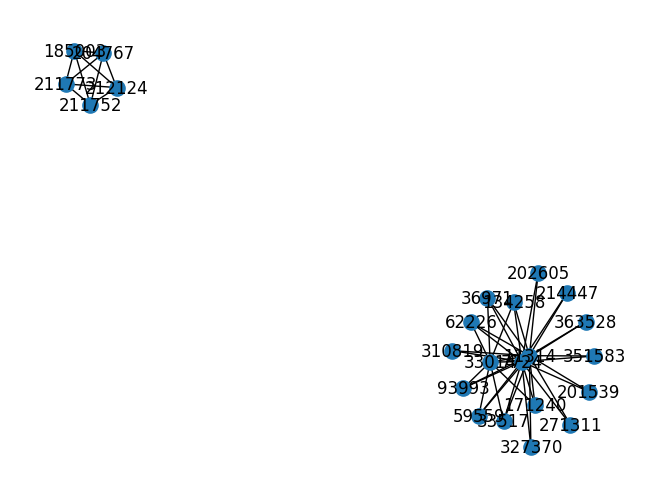

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(edge_list[:100])
nx.draw(G, with_labels=True, node_size=120)
plt.show()

In [90]:
import torch
from torch_geometric.data import Data


feature_cols = [
    
    'card4', 'card5', 'card6', 'addr1', 'addr2', 'ProductCD',
    'Transaction_day', 'Transaction_hour',
    'Transaction_weekday',  'TransactionAmt_binned',
    'isOutlier',
    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'M6', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321'
]
x = torch.tensor(df[feature_cols].values, dtype=torch.float)    # X — матрица признаков (np.array/pd.DataFrame.values) [num_nodes, num_features]
y = torch.tensor(df['isFraud'].values, dtype=torch.long)  # [num_nodes]

# Преобразуеv список рёбер (edge_list) в тензор PyTorch
edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

data = Data(x=x, edge_index=edge_index, y=y)
data

Data(x=[395677, 199], edge_index=[2, 44727084], y=[395677])

In [ ]:
from torch_geometric.loader import NeighborLoader

#device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
device = torch.device("cpu")
#data = data.to(device)

N_positive = (y == 1).sum().item()
N_negative = (y == 0).sum().item()
pos_weight = torch.tensor([N_negative / N_positive], dtype=torch.float).to(device)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)


# Пусть у тебя граф data как выше

batch_size = 512  # Сколько узлов (транзакций) в одном батче
num_neighbors = [10, 5]  # Сколько соседей собирать на 1-м и 2-м слоях

train_loader = NeighborLoader(
    data,
    num_neighbors=num_neighbors,
    batch_size=batch_size,
    shuffle=False,  # в обучении должен быть shuffle
)



Epoch 0, Loss: 1.3247
Epoch 1, Loss: 1.3501
Epoch 2, Loss: 1.3860
Epoch 3, Loss: 1.3560
Epoch 4, Loss: 1.3972
Epoch 5, Loss: 1.3665
Epoch 6, Loss: 1.3363
Epoch 7, Loss: 1.2783
Epoch 8, Loss: 1.3626
Epoch 9, Loss: 1.2985
Epoch 10, Loss: 1.3622
Epoch 11, Loss: 1.3668
Epoch 12, Loss: 1.3113
Epoch 13, Loss: 1.3626
Epoch 14, Loss: 1.3031


In [105]:
model_simple_gnn = SimpleGNN(input_dim=data.x.shape[1], hidden_dim=32).to(device)

train(model=model_simple_gnn, loader=train_loader, criterion=criterion, epochs=15)

Epoch 001/15, Avg Loss: 13.0544, LR: 0.00100
Epoch 002/15, Avg Loss: 5.4770, LR: 0.00100
Epoch 003/15, Avg Loss: 5.9190, LR: 0.00100
Epoch 004/15, Avg Loss: 5.2768, LR: 0.00100
Epoch 005/15, Avg Loss: 3.7436, LR: 0.00100
Epoch 006/15, Avg Loss: 3.8610, LR: 0.00100
Epoch 007/15, Avg Loss: 2.8950, LR: 0.00100
Epoch 008/15, Avg Loss: 1.8739, LR: 0.00100
Epoch 009/15, Avg Loss: 1.8604, LR: 0.00100
Epoch 010/15, Avg Loss: 1.3764, LR: 0.00100
Epoch 011/15, Avg Loss: 1.6254, LR: 0.00100
Epoch 012/15, Avg Loss: 1.4373, LR: 0.00100
Epoch 013/15, Avg Loss: 1.2957, LR: 0.00100
Epoch 014/15, Avg Loss: 1.2834, LR: 0.00100
Epoch 015/15, Avg Loss: 1.2135, LR: 0.00100


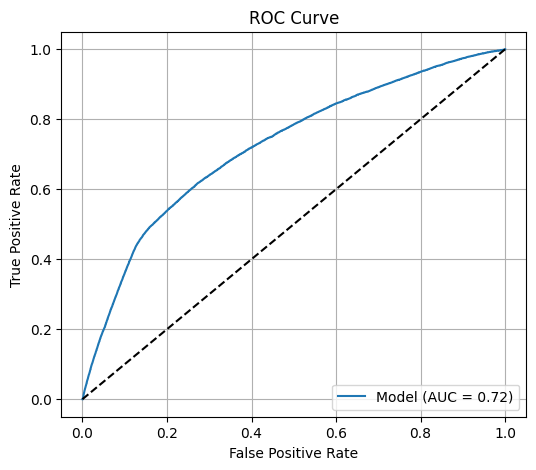

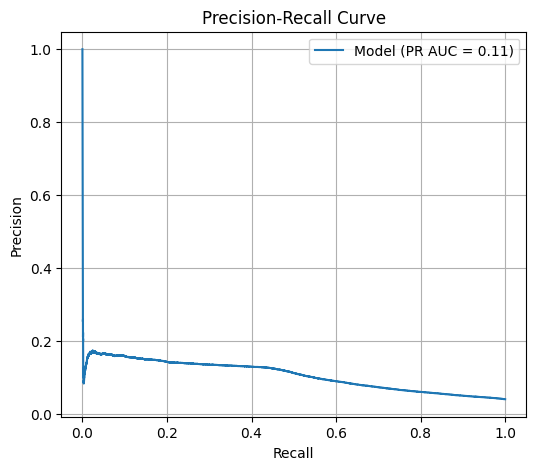

{'Accuracy': 0.6957265648496122,
 'F1': 0.1459722498084726,
 'AUC': np.float64(0.7228137649535104),
 'Precision': 0.08234955139543632,
 'Recall': 0.6418990579574522}

In [106]:
evaluate(model=model_simple_gnn, loader=train_loader, name="Model")

In [107]:
model_linear_gnn = GCNWithLinear(input_dim=data.x.shape[1], hidden_dim=32).to(device)

train(model=model_linear_gnn, loader=train_loader, criterion=criterion, epochs=15)

Epoch 001/15, Avg Loss: 3.6069, LR: 0.00100
Epoch 002/15, Avg Loss: 1.8068, LR: 0.00100
Epoch 003/15, Avg Loss: 1.4367, LR: 0.00100
Epoch 004/15, Avg Loss: 1.2704, LR: 0.00100
Epoch 005/15, Avg Loss: 1.2347, LR: 0.00100
Epoch 006/15, Avg Loss: 1.1946, LR: 0.00100
Epoch 007/15, Avg Loss: 1.1907, LR: 0.00100
Epoch 008/15, Avg Loss: 1.1755, LR: 0.00100
Epoch 009/15, Avg Loss: 1.1658, LR: 0.00100
Epoch 010/15, Avg Loss: 1.1639, LR: 0.00100
Epoch 011/15, Avg Loss: 1.1612, LR: 0.00100
Epoch 012/15, Avg Loss: 1.1554, LR: 0.00100
Epoch 013/15, Avg Loss: 1.1545, LR: 0.00100
Epoch 014/15, Avg Loss: 1.1537, LR: 0.00100
Epoch 015/15, Avg Loss: 1.1512, LR: 0.00100


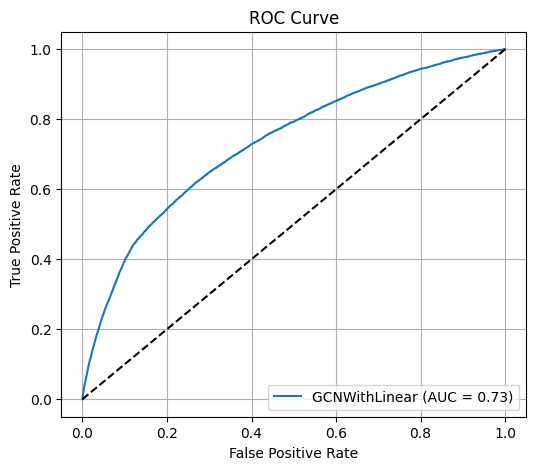

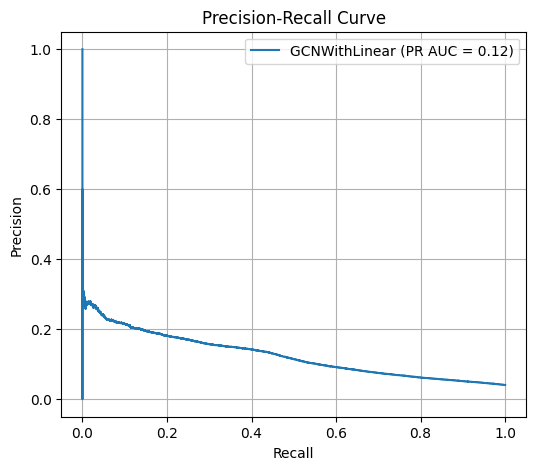

{'Accuracy': 0.7067633448494606,
 'F1': 0.15006629405258107,
 'AUC': np.float64(0.7332096579715524),
 'Precision': 0.08501543773447097,
 'Recall': 0.6390292594672157}

In [108]:
evaluate(model=model_linear_gnn, loader=train_loader, name="GCNWithLinear")